# Time Series - Clustering Multiple Series example

###### Links: [Walmart dataset (Kaggle)](https://www.kaggle.com/c/m5-forecasting-uncertainty/overview)  |  [Article ()]()

### 0 - Setup

###### Import pckgs 

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from ts_utils import *
import datetime

###### Import data

In [150]:
dtf = pd.read_csv('data_multiple.csv')
dtf.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_536_CA_1_validation,FOODS_3_536,FOODS_3,FOODS,CA_1,CA,3,2,2,4,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382_CA_3_validation,FOODS_3_382,FOODS_3,FOODS,CA_3,CA,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375_WI_1_validation,HOUSEHOLD_1_375,HOUSEHOLD_1,HOUSEHOLD,WI_1,WI,1,0,0,1,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084_CA_3_validation,FOODS_2_084,FOODS_2,FOODS,CA_3,CA,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668_CA_1_validation,FOODS_3_668,FOODS_3,FOODS,CA_1,CA,22,9,7,12,...,10,10,8,8,9,10,6,6,10,6


In [151]:
## Randomly reduce number of ts
dtf = dtf.drop_duplicates("item_id", keep='first').head(1000).reset_index(drop=True)
dtf = dtf.drop(["id","dept_id","state_id","store_id"], axis=1)
dtf.head()

,item_id,cat_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,FOODS_3_536,FOODS,3,2,2,4,0,0,2,3,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382,FOODS,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375,HOUSEHOLD,1,0,0,1,0,1,2,3,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084,FOODS,0,0,0,0,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668,FOODS,22,9,7,12,17,20,13,29,...,10,10,8,8,9,10,6,6,10,6


In [152]:
## Create dates list
cols = dtf.filter(like="d_", axis=1).columns.tolist()
dates = pd.date_range(start=(datetime.datetime.now() - datetime.timedelta(days=len(cols)-1)).strftime("%Y-%m-%d"),
                      end=datetime.datetime.now().strftime("%Y-%m-%d"), 
                      freq='D').astype(str).tolist()
print(dates[0:5], "...", dates[-1])

['2016-03-17', '2016-03-18', '2016-03-19', '2016-03-20', '2016-03-21'] ... 2021-06-11


In [153]:
## Rename columns
dtf.columns = ["ts","exog"] + dates
dtf.head()

,ts,exog,2016-03-17,2016-03-18,2016-03-19,2016-03-20,2016-03-21,2016-03-22,2016-03-23,2016-03-24,...,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11
0,FOODS_3_536,FOODS,3,2,2,4,0,0,2,3,...,3,1,0,3,0,0,2,1,2,1
1,FOODS_3_382,FOODS,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,HOUSEHOLD_1_375,HOUSEHOLD,1,0,0,1,0,1,2,3,...,0,0,2,1,0,1,0,1,2,1
3,FOODS_2_084,FOODS,0,0,0,0,0,0,0,0,...,1,1,1,2,4,3,1,1,6,1
4,FOODS_3_668,FOODS,22,9,7,12,17,20,13,29,...,10,10,8,8,9,10,6,6,10,6


In [154]:
## Resample
dtf, dates = resample_multiple_ts(dtf, dates, rule="M", agg="sum")
dtf.head()

--- columns from: 1915 --> to: 66 ---


,ts,exog,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_3_536,FOODS,24,52,47,46,57,20,50,40,...,25,50,43,35,38,31,40,22,41,15
1,FOODS_3_382,FOODS,0,0,0,0,0,0,0,0,...,49,32,21,2,13,18,57,547,360,4
2,HOUSEHOLD_1_375,HOUSEHOLD,16,36,26,21,25,26,29,19,...,8,15,22,14,15,12,19,22,14,8
3,FOODS_2_084,FOODS,0,0,0,0,0,0,0,0,...,58,60,50,36,45,13,38,38,55,21
4,FOODS_3_668,FOODS,237,513,476,521,435,329,377,368,...,359,315,251,267,241,236,202,174,233,89


### 1 - Analysis

###### Visualization

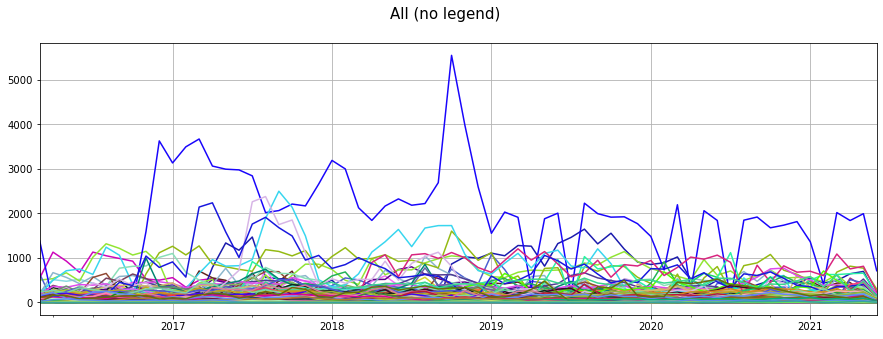

In [155]:
plot_multiple_ts(dtf, dates, color="ts", lst_colors=None, legend=False, title="All (no legend)", figsize=(15,5))

In [156]:
# -> Too many to spot a trend. let's try to color by exog:

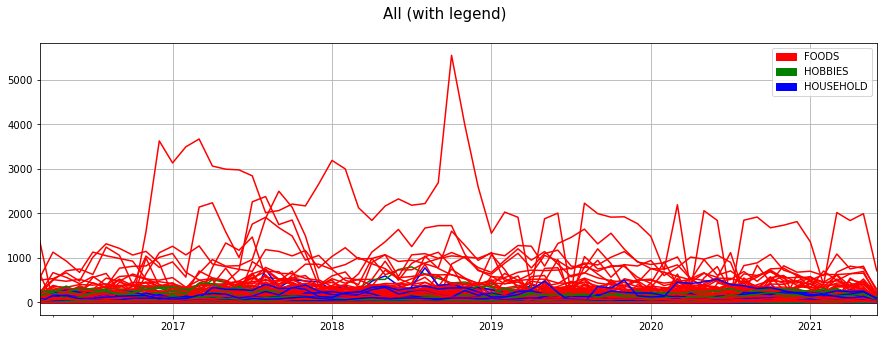

In [157]:
plot_multiple_ts(dtf, dates, color="exog", lst_colors=["red","green","blue"], legend=True, 
                 title="All (with legend)", figsize=(15,5))

In [158]:
# -> Same. Can the series be grouped by exog?

###### Group Series

In [188]:
method = "mean"

In [189]:
dtf_sum = summarize_multiple_ts(dtf, by="exog", aggs=[method], return_all=False)
dtf_sum

--- rows from: 1000 --> to: 3 ---


,ts,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_mean,22.476695,34.944915,33.828390,31.019068,35.976695,37.752119,41.360169,40.275424,47.000000,...,60.010593,63.252119,59.947034,58.127119,54.525424,48.334746,64.141949,62.944915,63.419492,22.762712
1,HOBBIES_mean,10.328431,15.460784,17.573529,16.823529,18.171569,18.539216,17.284314,18.661765,19.357843,...,22.215686,23.401961,21.774510,24.441176,23.029412,21.328431,22.274510,22.004902,20.651961,7.872549
2,HOUSEHOLD_mean,6.277778,13.327160,13.234568,13.083333,13.651235,14.364198,14.774691,14.765432,14.688272,...,25.095679,26.515432,24.231481,25.737654,23.950617,21.361111,25.037037,27.055556,26.182099,9.524691


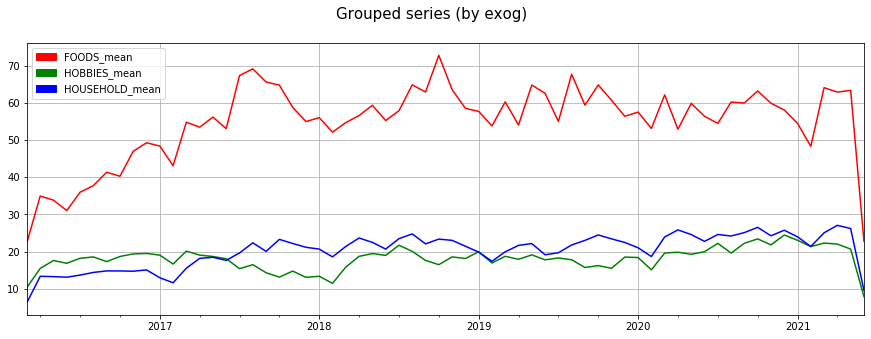

In [190]:
plot_multiple_ts(dtf_sum, dates, color="ts", lst_colors=["red","green","blue"], legend=True, 
                 title="Grouped series (by exog)", figsize=(15,5))

In [191]:
# -> It's more clear now, there is a visual pattern. But can those means be used as proxy for the series?

In [192]:
# Let's compare one mean with all the other series in the group (exog):
dtf_sum = summarize_multiple_ts(dtf[dtf["exog"]=="FOODS"], by=None, aggs=[method], return_all=True)
dtf_sum.tail()

--- rows from: 472 --> to: 473 ---


,ts,exog,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
468,FOODS_3_561,FOODS,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,65.000000,82.000000,96.000000,84.000000,111.000000,69.000000,84.000000,67.000000,94.000000,31.000000
469,FOODS_3_519,FOODS,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,25.000000,38.000000,34.000000,36.000000,36.000000,8.000000,13.000000,12.000000,21.000000
470,FOODS_2_221,FOODS,25.000000,63.000000,80.00000,56.000000,51.000000,37.000000,33.000000,47.000000,...,38.000000,34.000000,70.000000,48.000000,7.000000,30.000000,45.000000,37.000000,37.000000,11.000000
471,FOODS_2_310,FOODS,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,22.000000,26.000000,29.000000,15.000000,0.000000,0.000000,15.000000,24.000000,5.000000
472,mean,NaN,22.476695,34.944915,33.82839,31.019068,35.976695,37.752119,41.360169,40.275424,...,60.010593,63.252119,59.947034,58.127119,54.525424,48.334746,64.141949,62.944915,63.419492,22.762712


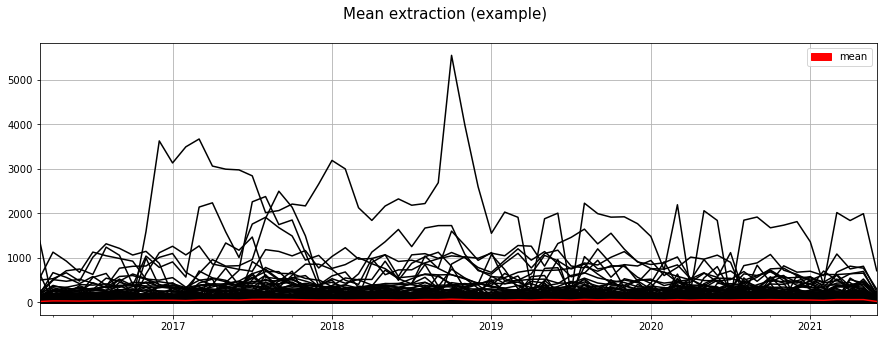

In [193]:
plot_multiple_ts(dtf_sum, dates, legend=True, lst_highlights=[method], 
                 title=method.capitalize()+" extraction (example)", figsize=(15,5))

In [165]:
# -> The mean is not representative of the group. So I'll find a new way of grouping the series with Clustering. 

### 3 - Clustering

###### Find Clusters

--- k not defined: using hierarchical clustering ---
--- found 1 clusters ---


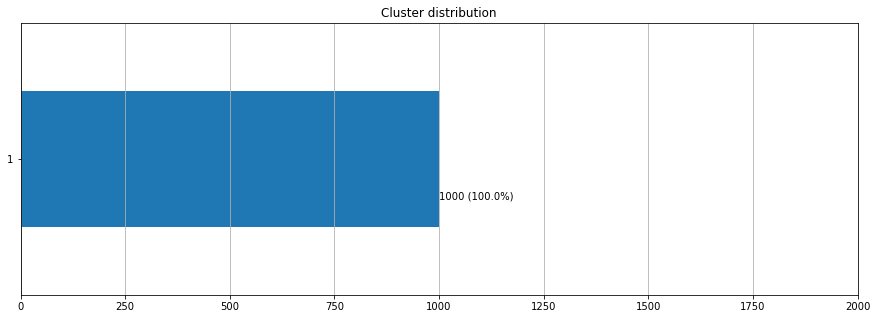

In [166]:
# Hierarchical
dtf_c = clustering_multiple_ts(dtf, dates, k=None, top=10, figsize=(15,5))

--- k=10: using k-means ---


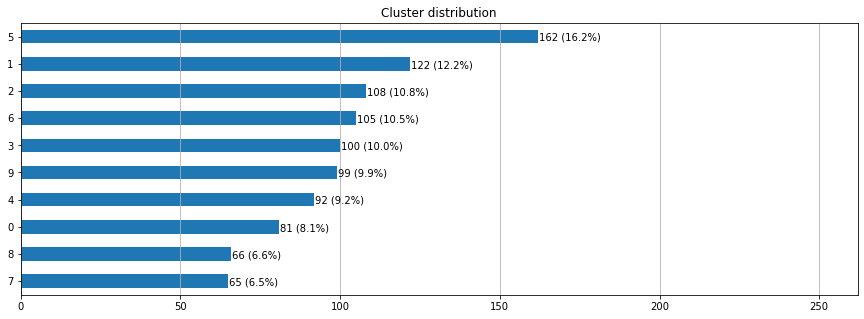

In [167]:
# K-means
dtf_c = clustering_multiple_ts(dtf, dates, k=10, figsize=(15,5))

In [168]:
dtf_c.head()

,ts,exog,cluster,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,FOODS_3_536,FOODS,2,24,52,47,46,57,20,50,...,25,50,43,35,38,31,40,22,41,15
1,FOODS_3_382,FOODS,7,0,0,0,0,0,0,0,...,49,32,21,2,13,18,57,547,360,4
2,HOUSEHOLD_1_375,HOUSEHOLD,2,16,36,26,21,25,26,29,...,8,15,22,14,15,12,19,22,14,8
3,FOODS_2_084,FOODS,3,0,0,0,0,0,0,0,...,58,60,50,36,45,13,38,38,55,21
4,FOODS_3_668,FOODS,2,237,513,476,521,435,329,377,...,359,315,251,267,241,236,202,174,233,89


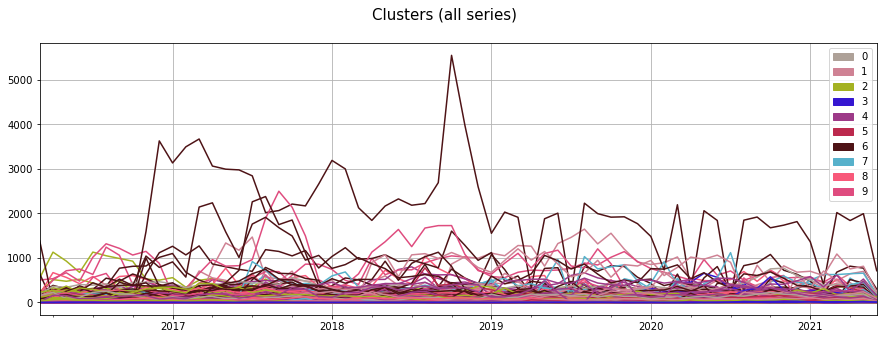

In [169]:
# Plot all clusters
plot_multiple_ts(dtf_c, dates, color="cluster", lst_colors=None, legend=True, 
                 title="Clusters (all series)", figsize=(15,5))

###### Check single cluster

In [194]:
c = 0
method = "mean"

In [195]:
dtf_sum = summarize_multiple_ts(dtf_c[dtf_c["cluster"]==c], by=None, aggs=[method], return_all=True)
dtf_sum.tail()

--- rows from: 81 --> to: 82 ---


,ts,exog,cluster,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
77,HOBBIES_1_254,HOBBIES,0.0,158.000000,224.000000,89.000000,114.000000,225.000000,254.000000,194.000000,...,182.000000,228.000000,187.000000,169.000000,118.000000,185.000000,139.000000,156.000000,190.000000,32.000000
78,HOUSEHOLD_2_395,HOUSEHOLD,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,10.000000,2.000000,...,12.000000,11.000000,6.000000,12.000000,9.000000,14.000000,23.000000,17.000000,11.000000,4.000000
79,HOUSEHOLD_2_393,HOUSEHOLD,0.0,1.000000,5.000000,4.000000,1.000000,5.000000,4.000000,3.000000,...,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.000000,4.000000,0.000000,0.000000
80,HOUSEHOLD_1_290,HOUSEHOLD,0.0,0.000000,1.000000,0.000000,2.000000,4.000000,6.000000,12.000000,...,34.000000,47.000000,42.000000,33.000000,22.000000,6.000000,17.000000,16.000000,21.000000,19.000000
81,mean,NaN,0.0,8.938272,19.814815,17.395062,16.567901,18.160494,17.246914,15.654321,...,25.283951,29.234568,27.975309,26.148148,26.333333,22.222222,23.888889,21.691358,22.555556,8.654321


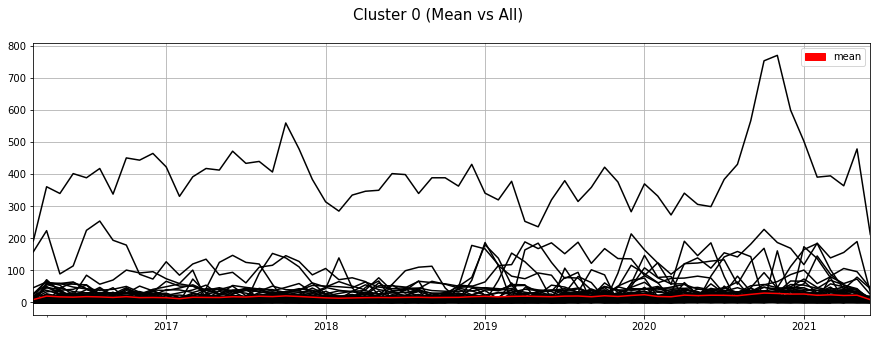

In [196]:
plot_multiple_ts(dtf_sum, dates, legend=True, lst_highlights=[method], 
                 title="Cluster "+str(c)+" ("+method.capitalize()+" vs All)", figsize=(15,5))

###### Group Series

In [197]:
# Summarize each cluster
dtf_sum = summarize_multiple_ts(dtf_c, by="cluster", aggs=[method], return_all=False)
dtf_sum

--- rows from: 1000 --> to: 10 ---


,ts,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,0_mean,8.938272,19.814815,17.395062,16.567901,18.160494,17.246914,15.654321,17.987654,15.098765,...,25.283951,29.234568,27.975309,26.148148,26.333333,22.222222,23.888889,21.691358,22.555556,8.654321
1,1_mean,2.081967,0.737705,0.836066,0.754098,1.655738,1.483607,2.254098,2.229508,2.500000,...,48.139344,51.434426,50.049180,56.680328,55.426230,50.803279,60.442623,58.040984,57.196721,21.073770
2,2_mean,39.638889,74.629630,68.527778,60.740741,62.638889,58.796296,63.212963,57.055556,51.268519,...,26.629630,26.675926,25.148148,26.777778,23.796296,24.768519,30.333333,32.027778,30.925926,11.898148
3,3_mean,2.150000,3.690000,3.400000,2.720000,2.910000,2.970000,3.660000,3.670000,3.150000,...,37.850000,39.790000,37.990000,36.290000,34.350000,33.220000,36.970000,36.490000,32.120000,12.800000
4,4_mean,11.304348,22.978261,24.445652,21.206522,27.184783,29.293478,30.521739,32.380435,35.184783,...,68.423913,66.021739,59.500000,67.108696,59.793478,51.423913,60.271739,54.478261,56.239130,20.054348
5,5_mean,0.722222,1.388889,1.234568,1.018519,0.796296,0.660494,0.839506,0.925926,1.185185,...,26.395062,27.771605,28.722222,27.500000,26.314815,23.932099,30.456790,30.839506,30.685185,12.098765
6,6_mean,44.666667,44.200000,53.238095,54.247619,55.342857,63.523810,75.400000,77.942857,115.104762,...,75.961905,78.238095,72.133333,67.076190,55.447619,41.142857,69.066667,72.000000,72.666667,26.800000
7,7_mean,7.353846,12.600000,11.676923,13.400000,14.492308,12.892308,13.046154,19.000000,16.276923,...,21.984615,26.153846,25.246154,26.338462,29.846154,30.276923,30.169231,43.953846,45.538462,12.215385
8,8_mean,11.075758,31.651515,28.969697,29.954545,40.530303,39.409091,46.136364,48.015152,51.651515,...,46.424242,53.257576,48.227273,50.045455,50.787879,43.666667,57.590909,50.257576,50.666667,17.348485
9,9_mean,22.424242,39.939394,39.171717,34.202020,43.676768,51.707071,43.888889,36.626263,35.656566,...,34.000000,37.515152,32.080808,25.454545,24.404040,23.363636,31.878788,33.101010,32.262626,10.515152


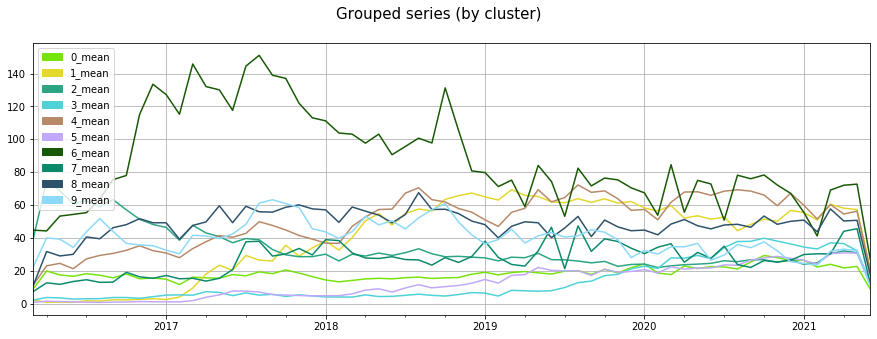

In [198]:
# Plot clusters
plot_multiple_ts(dtf_sum, dates, color="ts", lst_colors=None, legend=True, 
                 title="Grouped series (by cluster)", figsize=(15,5))

In [199]:
# -> I will work with the means series.

### 3 - Preprocessing

###### Partitioning

In [200]:
# By Rows
dtf_train, dtf_test = split_multiple_train_test(dtf_sum, idxs=None, test_size=0.2, idx_split=None)
print("train:", dtf_train.shape, "| test:", dtf_test.shape)

train: (8, 65) | test: (2, 65)


In [201]:
dtf_train

,ts,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
8,8_mean,11.075758,31.651515,28.969697,29.954545,40.530303,39.409091,46.136364,48.015152,51.651515,...,46.424242,53.257576,48.227273,50.045455,50.787879,43.666667,57.590909,50.257576,50.666667,17.348485
6,6_mean,44.666667,44.200000,53.238095,54.247619,55.342857,63.523810,75.400000,77.942857,115.104762,...,75.961905,78.238095,72.133333,67.076190,55.447619,41.142857,69.066667,72.000000,72.666667,26.800000
5,5_mean,0.722222,1.388889,1.234568,1.018519,0.796296,0.660494,0.839506,0.925926,1.185185,...,26.395062,27.771605,28.722222,27.500000,26.314815,23.932099,30.456790,30.839506,30.685185,12.098765
7,7_mean,7.353846,12.600000,11.676923,13.400000,14.492308,12.892308,13.046154,19.000000,16.276923,...,21.984615,26.153846,25.246154,26.338462,29.846154,30.276923,30.169231,43.953846,45.538462,12.215385
9,9_mean,22.424242,39.939394,39.171717,34.202020,43.676768,51.707071,43.888889,36.626263,35.656566,...,34.000000,37.515152,32.080808,25.454545,24.404040,23.363636,31.878788,33.101010,32.262626,10.515152
1,1_mean,2.081967,0.737705,0.836066,0.754098,1.655738,1.483607,2.254098,2.229508,2.500000,...,48.139344,51.434426,50.049180,56.680328,55.426230,50.803279,60.442623,58.040984,57.196721,21.073770
0,0_mean,8.938272,19.814815,17.395062,16.567901,18.160494,17.246914,15.654321,17.987654,15.098765,...,25.283951,29.234568,27.975309,26.148148,26.333333,22.222222,23.888889,21.691358,22.555556,8.654321
2,2_mean,39.638889,74.629630,68.527778,60.740741,62.638889,58.796296,63.212963,57.055556,51.268519,...,26.629630,26.675926,25.148148,26.777778,23.796296,24.768519,30.333333,32.027778,30.925926,11.898148


In [202]:
dtf_test

,ts,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
4,4_mean,11.304348,22.978261,24.445652,21.206522,27.184783,29.293478,30.521739,32.380435,35.184783,...,68.423913,66.021739,59.50,67.108696,59.793478,51.423913,60.271739,54.478261,56.23913,20.054348
3,3_mean,2.150000,3.690000,3.400000,2.720000,2.910000,2.970000,3.660000,3.670000,3.150000,...,37.850000,39.790000,37.99,36.290000,34.350000,33.220000,36.970000,36.490000,32.12000,12.800000


In [203]:
# By Columns
dtf_train, dtf_test = split_multiple_train_test(dtf_sum, idxs=dates, test_size=0.2, idx_split=None)
print("train:", dtf_train.shape, "| test:", dtf_test.shape)

--- splliting at 2020-06-30 (0.8) ---
train: (10, 52) | test: (10, 14)


In [204]:
dtf_train

,ts,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,0_mean,8.938272,19.814815,17.395062,16.567901,18.160494,17.246914,15.654321,17.987654,15.098765,...,20.061728,17.740741,20.814815,18.629630,21.827160,24.111111,18.555556,17.641975,22.814815,21.271605
1,1_mean,2.081967,0.737705,0.836066,0.754098,1.655738,1.483607,2.254098,2.229508,2.500000,...,63.827869,61.598361,63.729508,61.155738,62.106557,58.131148,56.385246,59.598361,51.983607,53.418033
2,2_mean,39.638889,74.629630,68.527778,60.740741,62.638889,58.796296,63.212963,57.055556,51.268519,...,25.870370,24.759259,25.648148,22.638889,23.796296,24.009259,21.935185,22.935185,23.629630,24.000000
3,3_mean,2.150000,3.690000,3.400000,2.720000,2.910000,2.970000,3.660000,3.670000,3.150000,...,12.730000,13.620000,16.950000,17.800000,21.070000,22.740000,21.380000,27.820000,27.610000,29.310000
4,4_mean,11.304348,22.978261,24.445652,21.206522,27.184783,29.293478,30.521739,32.380435,35.184783,...,72.184783,67.684783,68.565217,63.760870,56.706522,57.282609,50.978261,61.641304,67.858696,68.021739
5,5_mean,0.722222,1.388889,1.234568,1.018519,0.796296,0.660494,0.839506,0.925926,1.185185,...,19.956790,17.123457,20.919753,19.018519,19.537037,20.654321,18.586420,22.339506,20.913580,21.611111
6,6_mean,44.666667,44.200000,53.238095,54.247619,55.342857,63.523810,75.400000,77.942857,115.104762,...,82.380952,71.580952,76.390476,75.247619,70.428571,67.361905,53.723810,84.514286,55.571429,74.971429
7,7_mean,7.353846,12.600000,11.676923,13.400000,14.492308,12.892308,13.046154,19.000000,16.276923,...,47.261538,31.753846,39.384615,37.738462,33.692308,30.338462,34.276923,36.400000,25.153846,31.092308
8,8_mean,11.075758,31.651515,28.969697,29.954545,40.530303,39.409091,46.136364,48.015152,51.651515,...,53.030303,40.742424,50.818182,46.651515,44.303030,44.712121,41.833333,48.363636,51.121212,47.363636
9,9_mean,22.424242,39.939394,39.171717,34.202020,43.676768,51.707071,43.888889,36.626263,35.656566,...,41.222222,44.868687,43.404040,38.797980,27.919192,32.343434,30.101010,34.575758,34.525253,36.575758


In [205]:
dtf_test

,ts,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30
0,0_mean,22.530864,22.271605,21.037037,25.283951,29.234568,27.975309,26.148148,26.333333,22.222222,23.888889,21.691358,22.555556,8.654321
1,1_mean,51.327869,52.655738,44.336066,48.139344,51.434426,50.049180,56.680328,55.426230,50.803279,60.442623,58.040984,57.196721,21.073770
2,2_mean,24.462963,26.027778,25.472222,26.629630,26.675926,25.148148,26.777778,23.796296,24.768519,30.333333,32.027778,30.925926,11.898148
3,3_mean,27.280000,34.070000,37.740000,37.850000,39.790000,37.990000,36.290000,34.350000,33.220000,36.970000,36.490000,32.120000,12.800000
4,4_mean,65.880435,68.391304,69.250000,68.423913,66.021739,59.500000,67.108696,59.793478,51.423913,60.271739,54.478261,56.239130,20.054348
5,5_mean,21.592593,23.512346,23.327160,26.395062,27.771605,28.722222,27.500000,26.314815,23.932099,30.456790,30.839506,30.685185,12.098765
6,6_mean,72.780952,50.752381,78.114286,75.961905,78.238095,72.133333,67.076190,55.447619,41.142857,69.066667,72.000000,72.666667,26.800000
7,7_mean,27.553846,34.892308,23.723077,21.984615,26.153846,25.246154,26.338462,29.846154,30.276923,30.169231,43.953846,45.538462,12.215385
8,8_mean,45.454545,47.787879,48.227273,46.424242,53.257576,48.227273,50.045455,50.787879,43.666667,57.590909,50.257576,50.666667,17.348485
9,9_mean,26.404040,29.505051,35.959596,34.000000,37.515152,32.080808,25.454545,24.404040,23.363636,31.878788,33.101010,32.262626,10.515152


### 4 - Forecasting

In [206]:
ts_train = utils_filter_ts(dtf_train, name=str(c)+"_"+method, idxs=None)[str(c)+"_"+method]
ts_test = utils_filter_ts(dtf_test, name=str(c)+"_"+method, idxs=None)[str(c)+"_"+method]
ts_train.head()

2016-03-31     8.938272
2016-04-30    19.814815
2016-05-31    17.395062
2016-06-30    16.567901
2016-07-31    18.160494
Name: 0_mean, dtype: float64

###### Model Design & Testing (Exponential Smoothing)

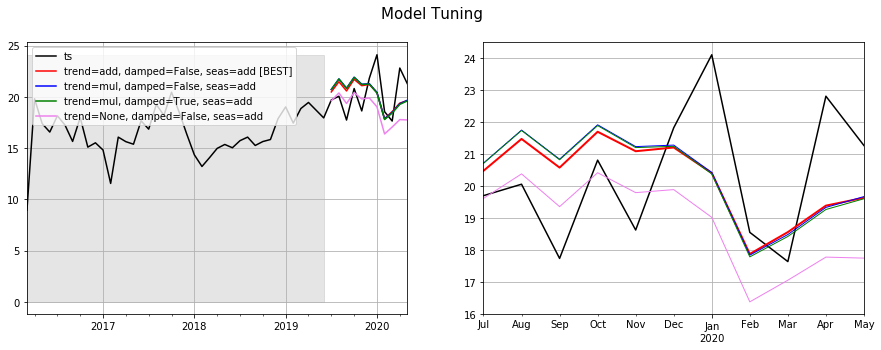

,combo,score,model
0,"trend=add, damped=False, seas=add",1.759665,<statsmodels.tsa.holtwinters.HoltWintersResult...
1,"trend=mul, damped=False, seas=add",1.853193,<statsmodels.tsa.holtwinters.HoltWintersResult...
2,"trend=mul, damped=True, seas=add",1.864145,<statsmodels.tsa.holtwinters.HoltWintersResult...
3,"trend=None, damped=False, seas=add",1.992724,<statsmodels.tsa.holtwinters.HoltWintersResult...
4,"trend=mul, damped=True, seas=None",2.150727,<statsmodels.tsa.holtwinters.HoltWintersResult...


In [207]:
# Tuning
res = tune_expsmooth_model(ts_train, s=12, val_size=0.2, scoring=metrics.mean_absolute_error, top=4, figsize=(15,5))
res.head()

Seasonal parameters: additive Seasonality every 12 observations
--- computing confidence interval ---


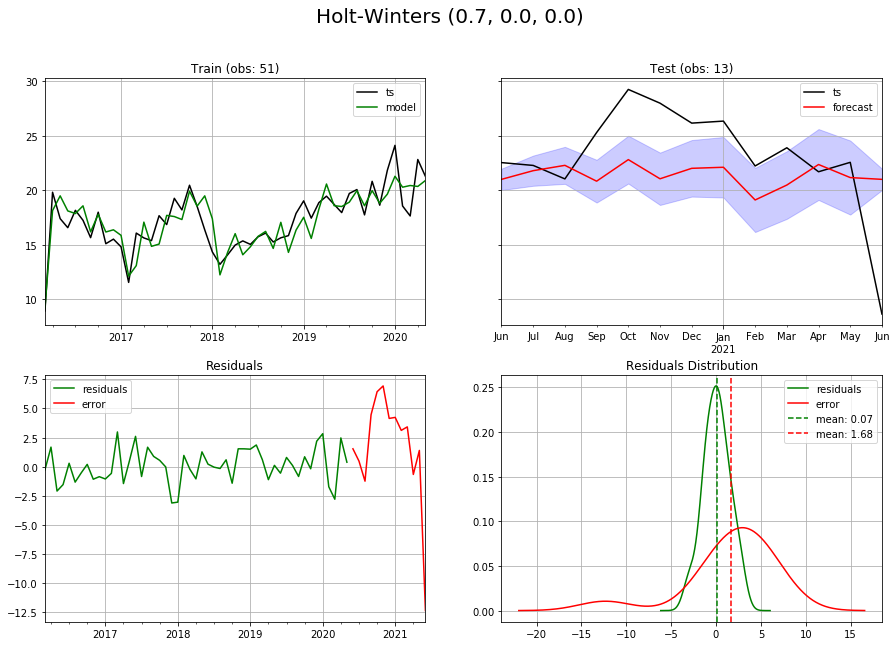

Training --> Residuals mean: 0.0  | std: 1.0
Test --> Error mean: 2.0  | std: 5.0  | mae: 4.0  | mape: 22.0 %  | mse: 25.0  | rmse: 5.0


In [208]:
# Train/Test
res, model = fit_expsmooth(ts_train, ts_test, trend="additive", damped=True, seasonal="additive", s=12,
                           factors=(None,None,None), conf=0.50, figsize=(15,10))

###### Model Desing & Testing (Custom Model)

--- generating index date --> freq: M | start: 2019-07-31 00:00:00 | end: 2020-04-30 00:00:00 | len: 10 ---


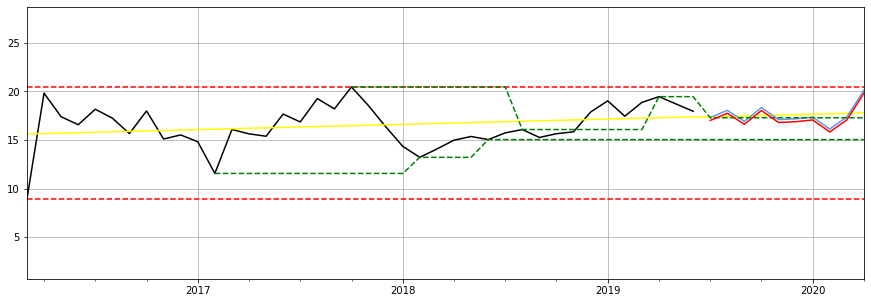

In [214]:
# Tuning
tune = custom_model(ts_train.head(int(0.8*len(ts_train))), pred_ahead=int(0.2*len(ts_train)), 
                    trend=True, seasonality_types=["moy"], 
                    level_window=3, sup_res_windows=(12,12), floor_cap=(True,True), 
                    plot=True, figsize=(15,5))

In [216]:
trend = True
seasonality_types = ["moy"]
level_window = 13
sup_res_windows = (12,12)
floor_cap = (True,True)

--- generating index date --> freq: M | start: 2020-06-30 00:00:00 | end: 2021-06-30 00:00:00 | len: 13 ---
--- computing confidence interval ---


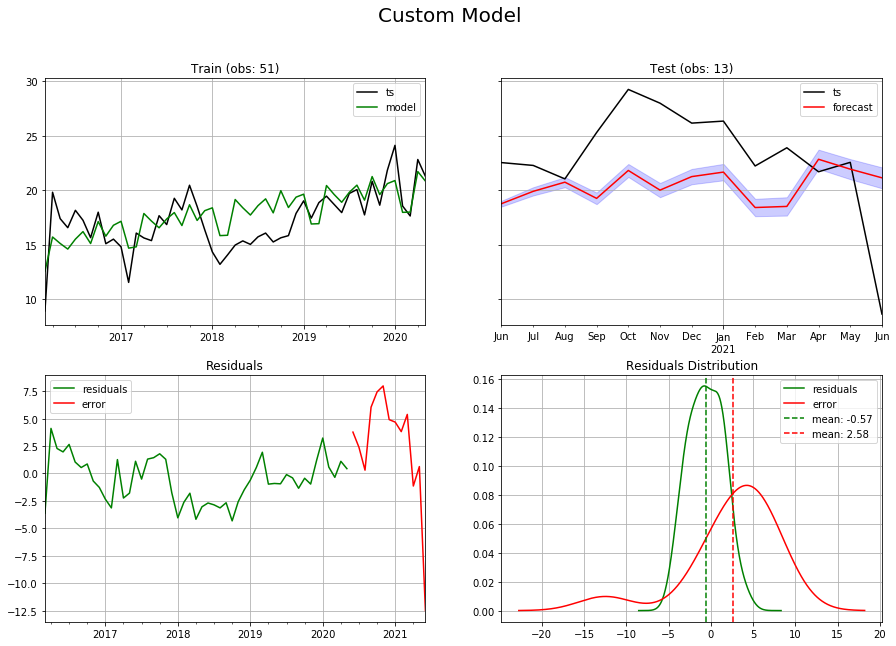

Training --> Residuals mean: -1.0  | std: 2.0
Test --> Error mean: 3.0  | std: 5.0  | mae: 5.0  | mape: 26.0 %  | mse: 32.0  | rmse: 6.0


In [217]:
res = fit_custom_model(ts_train, ts_test, trend, seasonality_types, level_window, sup_res_windows, floor_cap,
                       conf=0.1, figsize=(15,10))

###### Forecast multiple series

### HOBBIES_2_004
--- generating index date --> freq: M | start: 2021-07-31 00:00:00 | end: 2022-05-31 00:00:00 | len: 11 ---
--- computing confidence interval ---


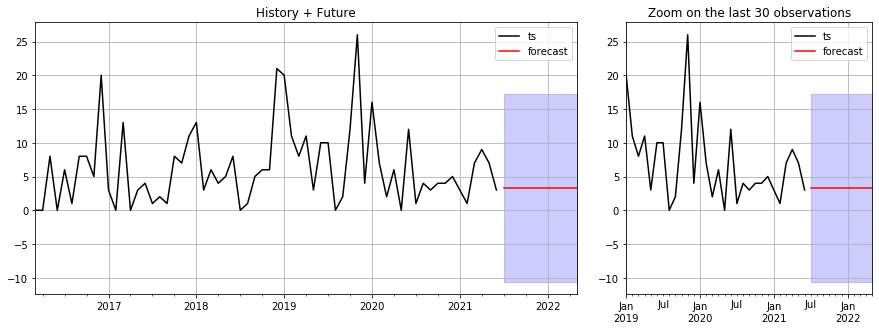

### HOBBIES_2_148
--- generating index date --> freq: M | start: 2021-07-31 00:00:00 | end: 2022-05-31 00:00:00 | len: 11 ---
--- computing confidence interval ---


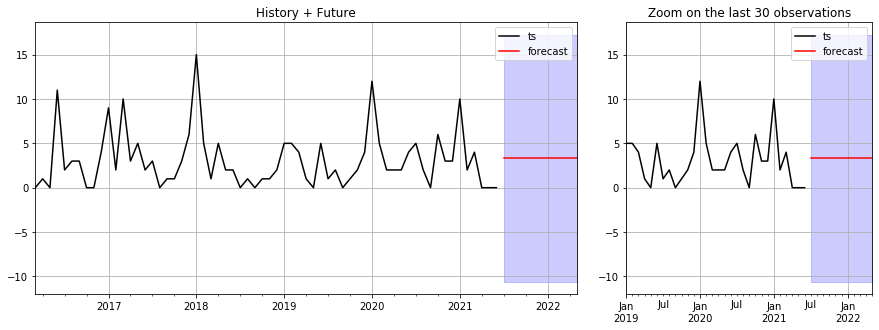

### FOODS_1_055
--- generating index date --> freq: M | start: 2021-07-31 00:00:00 | end: 2022-05-31 00:00:00 | len: 11 ---
--- computing confidence interval ---


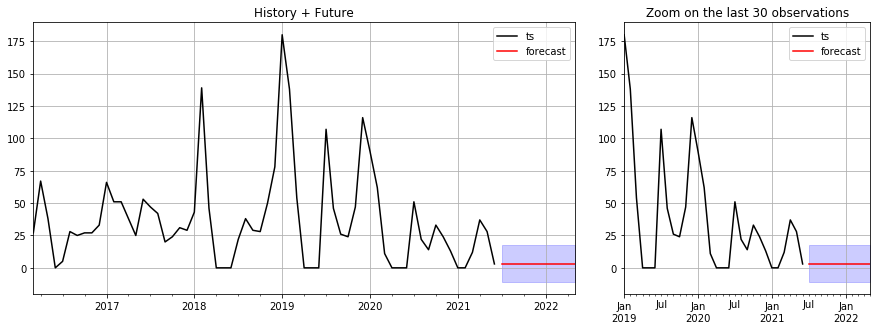

In [212]:
for name in dtf_c[dtf_c["cluster"]==c]["ts"].values[:3]:
    print("###", name)
    ts = utils_filter_ts(dtf_c, name=name, idxs=dates)[name]
    future = forecast_autoregressive(ts, model, pred_ahead=12, conf=0.30, zoom=30, figsize=(15,5))